### This challenge deals with forecasting. The subject is budget plan, based on possible cases and some rules.

#### We need to estimate the next year money amount to be paid for our labor force. They sell goods/services and get paid by commission, following a specific table (rules). The higher they sell, the higher they get paid.

## Problem = estimate the total money amount we need to paid them for the next year.

#### Commission rules: there is a table with the rates according to the amount sold, and it is not linear.

#### if the sold amount is between 100 and 3000, the commission rate is 0.5%. Between 3000 and 5000, the rate shall be 1.3%, and between 5000 and 6000, the rate equals to 2.8%.

#### There is no past data to check yet, then we need to make assumptions: Taks force = 10 people. Each sell is a multiple of 100.00. Individually, the upper bound sell sum is 80.000.00 in a year.

## Challenge tasks: read the problem statement and sketch how to use the Monte Carlo technique to answer the main question. Use a task flow diagram addressing: inputs, actions and outcomes. Use Python coding to make a algorithm to forecast the amount to be paid to the task force in the next year.

### Hints: evaluate how the total amount may be made, which is a function of the total sells. This parameter is random in the end, because it depends on the labor force productivity.

### Guidance: make the assumptions with a Python function, set the number and value of the sells with a random command, simulate it several times, show the results by a graphic way.

#### Grades: 30% for the task flow diagram. 60% for the Python code. 10% for the graphic output.

#### Solution +++++++++++++++++++++++++++++++++++++++++++++

## 01 - Import Libraries

In [ ]:
pip install ggplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.3 MB/s eta 0:00:00


In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt
# from ggplot import *
import time

## 02 -- Functions Definition

In [ ]:
def commission(sales):
  # commission = amount to paid due to the sale done
  # sales = money value sold by the task force (workers)
  # Bottomline = Rules defined by the problem statement
    if sales >= 100 and sales <= 3000:
        return .005 # number to be considered or to provide
    elif sales > 3000 and sales <= 5000:
        return .013
    else:
        return .028

In [ ]:
def simulate_commission(iterat):
  # function to do the Monte Carlo algorithm or technique
  # iterat = number of possible cases or iterations to simulate.
    amount = [] # empty list to be used later on
    for i in range(iterat): # loop to make the Monte Carlo iteration
      sales = random.sample(range(100, 80000, 100), 10) # simulation of a sale, according to the problem statement
      # using random numbers, it comes close to reality, avoiding bias
      data = pd.DataFrame({'Vendas': sales}) # organizing things within a dataframe
      data['Rates'] = data.Vendas.apply(commission) # take commission acording to the function.
      data['Commission'] = data.Vendas * data.Rates # the calculation of the money amount to be paid due to the sales and commissions.
      amount.append(
          [
          data.Vendas.sum().round(),
          data.Commission.sum().round(),
          ]
      )
      # special collection: two values at the same time, using round values.
    return amount # the result we need to present

In [ ]:
def dindim (x, pos): # function to treat the decimals.
# x = input value, it can be anyone
# pos = output value, following a certain pattern
    if x >= 1e3:
        s = '${:1.1f}k'.format(x*1e-3)
    else:
        s = '${:1.0f}'.format(x*1e-2)
    return s

In [ ]:
def graph(a,b):
  plt.style.use('fivethirtyeight')
  plt.rcParams['figure.facecolor'] = 'lightblue'
  plt.grid(True, color = 'black', linestyle = '-')

  plt.scatter(x = a, y = b, color = 'orange')

In [ ]:
def simul(a,n):
  orange = pd.DataFrame({'Vendas': a}) # data organization with a single colum 'Vendas'.
  result = simulate_commission(n)
  result = pd.DataFrame.from_records(result, columns=['Vendas', 'Commission'])
  a = result.describe()
  a
  fig, ax = plt.subplots()
  ax.xaxis.set_major_formatter(dindim)
  result.Commission.plot(kind='hist', title='Amount: Comissoes Previstas',
                        color = 'lightgreen',bins = 50, edgecolor = 'black')
  plt.grid(True, color = 'purple', linestyle = '-')
  plt.show()
  a = result.describe()
  return a

## 03 -- Data generation or input

In [ ]:
START = time.time()

### POSSIBLE CASES - SALES/VENDAS

In [ ]:
sales = random.sample(range(100, 80000, 100), 10)
sales2 = random.sample(range(100,8000,100),10)
sales3 = random.sample(range(100,4000,100),10)
sales4 = random.sample(range(100,20000,100),10)
# randomness of the challenge: how the sells may be made.
# 100 = minimum value of a single sell. There is no sale like 90.00.
# 80000 = maximum value of selling in a year
# 100 = minimum sell step. There is no sale like 105.00.
# 10 = quantity of task force people

In [ ]:
CASO =  sales

In [ ]:
orange = pd.DataFrame({'Vendas': CASO}) # data organization with a single colum 'Vendas'.

In [ ]:
orange.describe() # data overall check. Order of magnitude.

,Vendas
count,10.000000
mean,51480.000000
std,19570.147334
min,22100.000000
25%,34675.000000
50%,52550.000000
75%,69475.000000
max,75500.000000


In [ ]:
orange['Rates'] = orange.Vendas.apply(commission)
orange.head(5)

,Vendas,Rates
0,59500,0.028
1,62500,0.028
2,71800,0.028
3,73600,0.028
4,40000,0.028


In [ ]:
orange['Commission'] = orange.Vendas * orange.Rates # that´s the value to be paid, next year.
orange.head(5)

,Vendas,Rates,Commission
0,59500,0.028,1666.0
1,62500,0.028,1750.0
2,71800,0.028,2010.4
3,73600,0.028,2060.8
4,40000,0.028,1120.0


### 3.1 - Data input visual check

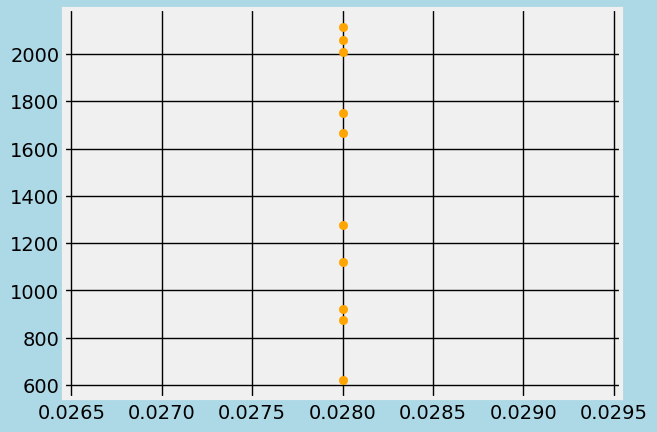

In [ ]:
graph(orange['Rates'], orange['Commission'])

In [ ]:
# p = ggplot(aes(x='Vendas'), data=orange)
# p + geom_histogram(binwidth=1)

## 04 -- Monte Carlo running

In [ ]:
result = simulate_commission(5000)
result = pd.DataFrame.from_records(result, columns=['Vendas', 'Commission'])
result

,Vendas,Commission
0,342500,9590.0
1,329700,9149.0
2,349400,9783.0
3,379600,10629.0
4,389300,10900.0
...,...,...
4995,340900,9545.0
4996,369500,10346.0
4997,466200,13054.0
4998,286800,7984.0


In [ ]:
result.describe().round()

,Vendas,Commission
count,5000.0,5000.0
mean,399963.0,11171.0
std,72353.0,2040.0
min,169700.0,4749.0
25%,350475.0,9780.0
50%,399200.0,11149.0
75%,448425.0,12534.0
max,638700.0,17884.0


## 05 -- Graph or first Dashboard proposal

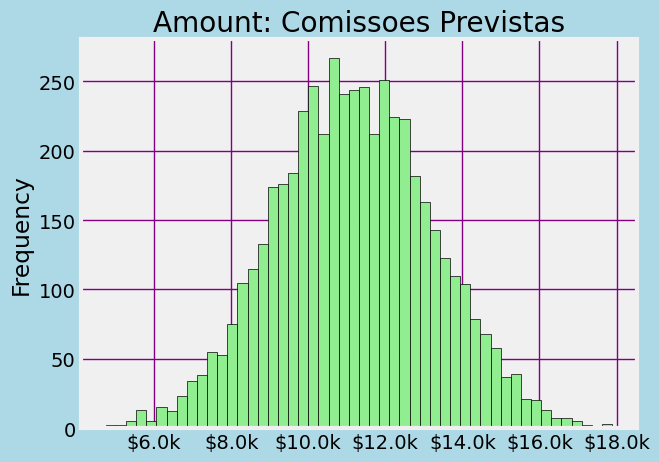

In [ ]:
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(dindim)
result.Commission.plot(kind='hist', title='Amount: Comissoes Previstas',
                       color = 'lightgreen',bins = 50, edgecolor = 'black')
plt.grid(True, color = 'purple', linestyle = '-')
plt.show()

In [ ]:
N = 10000

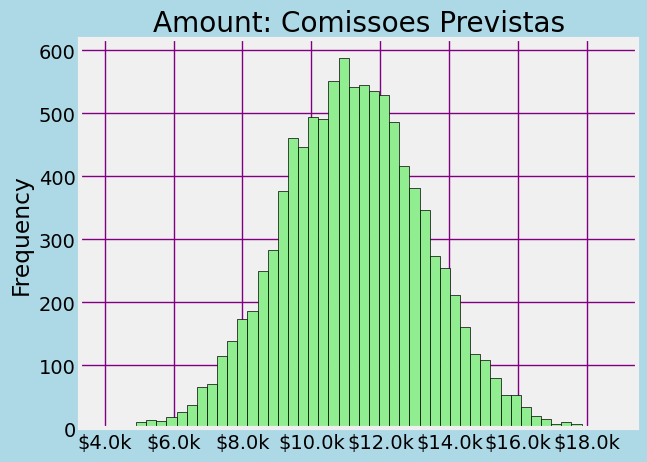

,Vendas,Commission
count,10000.000000,10000.000000
mean,401146.910000,11204.068400
std,73018.018718,2058.762173
min,149500.000000,4033.000000
25%,350700.000000,9781.000000
50%,400300.000000,11188.500000
75%,449800.000000,12580.000000
max,668400.000000,18715.000000


In [ ]:
simul(sales,N)

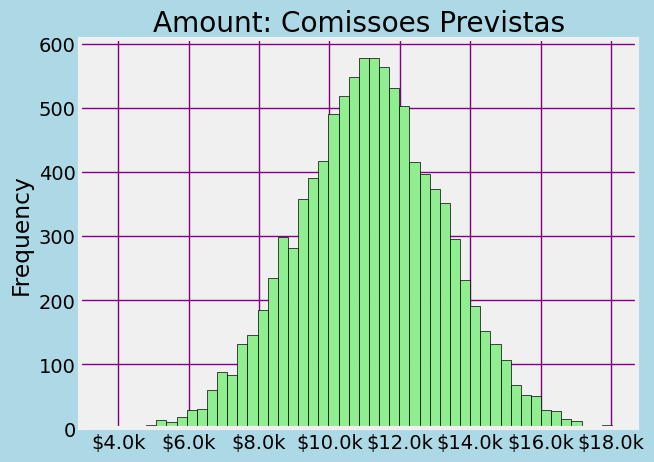

,Vendas,Commission
count,10000.000000,10000.000000
mean,399643.580000,11160.922700
std,73135.737765,2062.313162
min,135000.000000,3640.000000
25%,350700.000000,9782.000000
50%,399800.000000,11164.500000
75%,448900.000000,12558.000000
max,643900.000000,18029.000000


In [ ]:
simul(sales2,N)

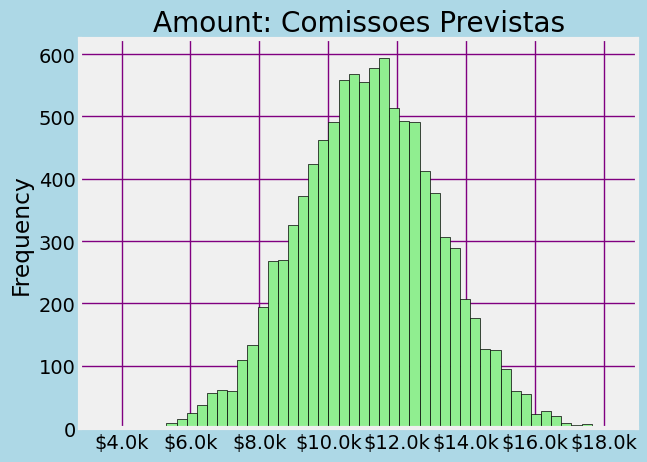

,Vendas,Commission
count,10000.000000,10000.000000
mean,400291.460000,11179.028300
std,71584.866462,2018.741088
min,127700.000000,3539.000000
25%,351200.000000,9807.750000
50%,399900.000000,11180.000000
75%,448925.000000,12550.000000
max,651200.000000,18234.000000


In [ ]:
simul(sales3,N)

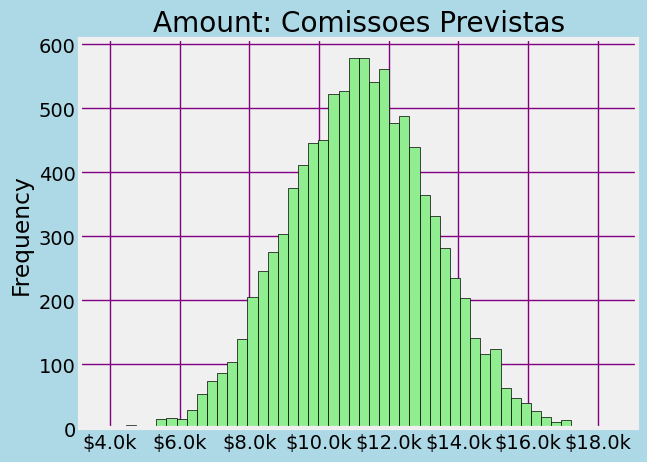

,Vendas,Commission
count,10000.000000,10000.000000
mean,400577.120000,11187.394600
std,72327.505316,2039.981788
min,145100.000000,3879.000000
25%,350900.000000,9784.000000
50%,400900.000000,11201.000000
75%,449900.000000,12575.500000
max,657400.000000,18407.000000


In [ ]:
simul(sales4,N)

In [ ]:
STOP = time.time()
DURATION = round(STOP - START, 2)
DURATION

86.25